# Weather Retrieval

<br>

### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time

from DarkSky import Wrapper 
from windrose import WindroseAxes

from ipypb import track

C:\Users\ABour\Anaconda3\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
C:\Users\ABour\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\ABour\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\ABour\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc

<br>

### Helper Functions

In [2]:
def hide_spines(ax, positions=['top', 'right']):
    """
    Pass a matplotlib axis and list of positions with spines to be removed
    
    args:
        ax:          Matplotlib axis object
        positions:   Python list e.g. ['top', 'bottom']
    """
    assert isinstance(positions, list), 'Position must be passed as a list '
    
    for position in positions:
        ax.spines[position].set_visible(False)

<br>

### Making a Request

You will have to add your own API key, they can be requested from <a href="https://darksky.net/dev">here</a>.

In [3]:
API_key = ''

dt = pd.to_datetime('2018-01-01')
latitude = '51.516554'
longitude = '-0.218503'

darksky = Wrapper(API_key)
df = darksky.lat_lon_dt_2_df(latitude, longitude, time=dt)

df.head()

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType
0,2018-01-01 00:00:00,Partly Cloudy,partly-cloudy-night,0.0,0.0,7.12,4.24,3.85,0.80,997.3,4.42,7.43,251,0.47,0,10.003,NaN
1,2018-01-01 01:00:00,Partly Cloudy,partly-cloudy-night,0.0,0.0,6.81,4.44,3.50,0.79,998.3,3.37,5.39,259,0.31,0,10.003,NaN
2,2018-01-01 02:00:00,Clear,clear-night,0.0,0.0,6.31,4.08,3.12,0.80,999.5,2.99,5.12,250,0.19,0,10.003,NaN
3,2018-01-01 03:00:00,Clear,clear-night,0.0,0.0,6.09,3.70,2.78,0.79,999.5,3.16,5.86,242,0.09,0,10.003,NaN
4,2018-01-01 04:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,5.95,3.74,2.80,0.80,999.6,2.88,5.97,232,0.70,0,10.003,NaN


<br>

### Retrieving Data Over a Date Range

Before making the requests we have to create the date range

In [4]:
start_date = '2018-09-20 11:00:00'
end_date = '2020-01-13 00:00:00'

dt_rng = pd.date_range(start_date, end_date, freq='D')

dt_rng

DatetimeIndex(['2018-09-20 11:00:00', '2018-09-21 11:00:00',
               '2018-09-22 11:00:00', '2018-09-23 11:00:00',
               '2018-09-24 11:00:00', '2018-09-25 11:00:00',
               '2018-09-26 11:00:00', '2018-09-27 11:00:00',
               '2018-09-28 11:00:00', '2018-09-29 11:00:00',
               ...
               '2020-01-03 11:00:00', '2020-01-04 11:00:00',
               '2020-01-05 11:00:00', '2020-01-06 11:00:00',
               '2020-01-07 11:00:00', '2020-01-08 11:00:00',
               '2020-01-09 11:00:00', '2020-01-10 11:00:00',
               '2020-01-11 11:00:00', '2020-01-12 11:00:00'],
              dtype='datetime64[ns]', length=480, freq='D')

<br>

We're now ready to iterate over the dates and combine them within a single dataframe

In [5]:
df = pd.DataFrame()

for dt in track(dt_rng):
    df_dt = darksky.lat_lon_dt_2_df(latitude, longitude, time=dt)
    df = df.append(df_dt, sort=False)
    
    time.sleep(1) # Significantly reduces the number of times the request is rejected
    
df.head(2)

 [████████████████████████████████████████████████████████████] 480/480 [08:02<00:01, 1.00s/it]

,time,summary,icon,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipAccumulation
0,2018-09-20 00:00:00,Overcast,cloudy,0.0276,0.06,rain,18.26,18.26,14.94,0.81,1014.5,5.55,11.12,229,0.93,0,16.093,291.0,NaN
1,2018-09-20 01:00:00,Overcast,cloudy,0.0262,0.06,rain,17.95,17.95,14.85,0.82,1014.5,5.17,10.22,214,0.90,0,16.093,292.2,NaN


In [6]:
df.tail(2)

,time,summary,icon,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipAccumulation
22,2020-01-12 22:00:00,Clear,clear-night,0.0,0.0,NaN,7.32,4.92,4.37,0.82,1020.3,3.61,9.67,224,0.05,0,16.093,347.7,NaN
23,2020-01-12 23:00:00,Clear,clear-night,0.0,0.0,NaN,7.14,4.71,4.12,0.81,1020.6,3.59,10.29,223,0.19,0,16.093,356.5,NaN


<br>

We'll save the dataframe before moving on to the EDA

In [7]:
save_df = True

if save_df == True:
    df.to_csv('data/darksky_weather.csv', index=False)

<br>

### Exploratory Data Analysis

We start by reading in the data

In [8]:
read_df = True

if read_df == True:
    df = pd.read_csv('data/darksky_weather.csv')
    df['time'] = pd.to_datetime(df['time'])
    
df_focus = df.set_index('time')[['temperature', 'windBearing', 'windSpeed', 'ozone', 'precipIntensity']]

df_focus.head()

,temperature,windBearing,windSpeed,ozone,precipIntensity
time,,,,,
2018-09-20 00:00:00,18.26,229,5.55,291.0,0.0276
2018-09-20 01:00:00,17.95,214,5.17,292.2,0.0262
2018-09-20 02:00:00,18.00,214,5.45,292.2,0.0254
2018-09-20 03:00:00,18.12,216,5.98,292.0,0.0253
2018-09-20 04:00:00,18.25,217,6.34,292.0,0.0250


<br>

We'll now look at how temperature varies over the date range

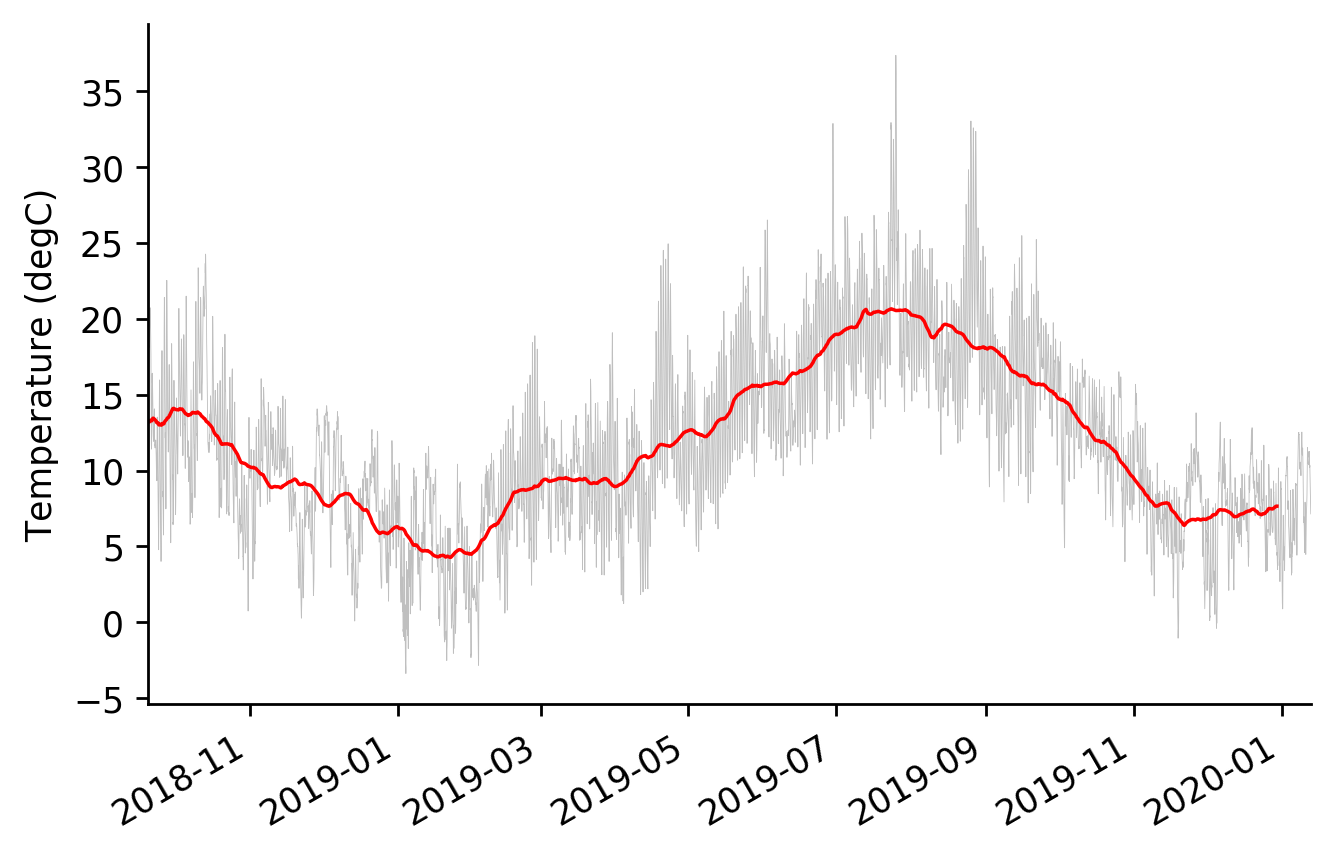

In [9]:
rolling_days = 28

s_rolling_temp = (df_focus
                  ['temperature']
                  .rolling(f'{rolling_days}D')
                  .mean()
                  .shift(-rolling_days//2, freq='D')
                 )

## Plotting
fig, ax = plt.subplots(dpi=250)

df_focus['temperature'].plot(ax=ax, color='k', linewidth=0.25, alpha=0.25)
s_rolling_temp.plot(ax=ax, color='red', linewidth=1)

ax.set_xlabel('')
ax.set_ylabel('Temperature (degC)')
ax.set_xlim(df_focus.index[0], df_focus.index[-1])

hide_spines(ax)

<br>

We can also create a windrose for the site

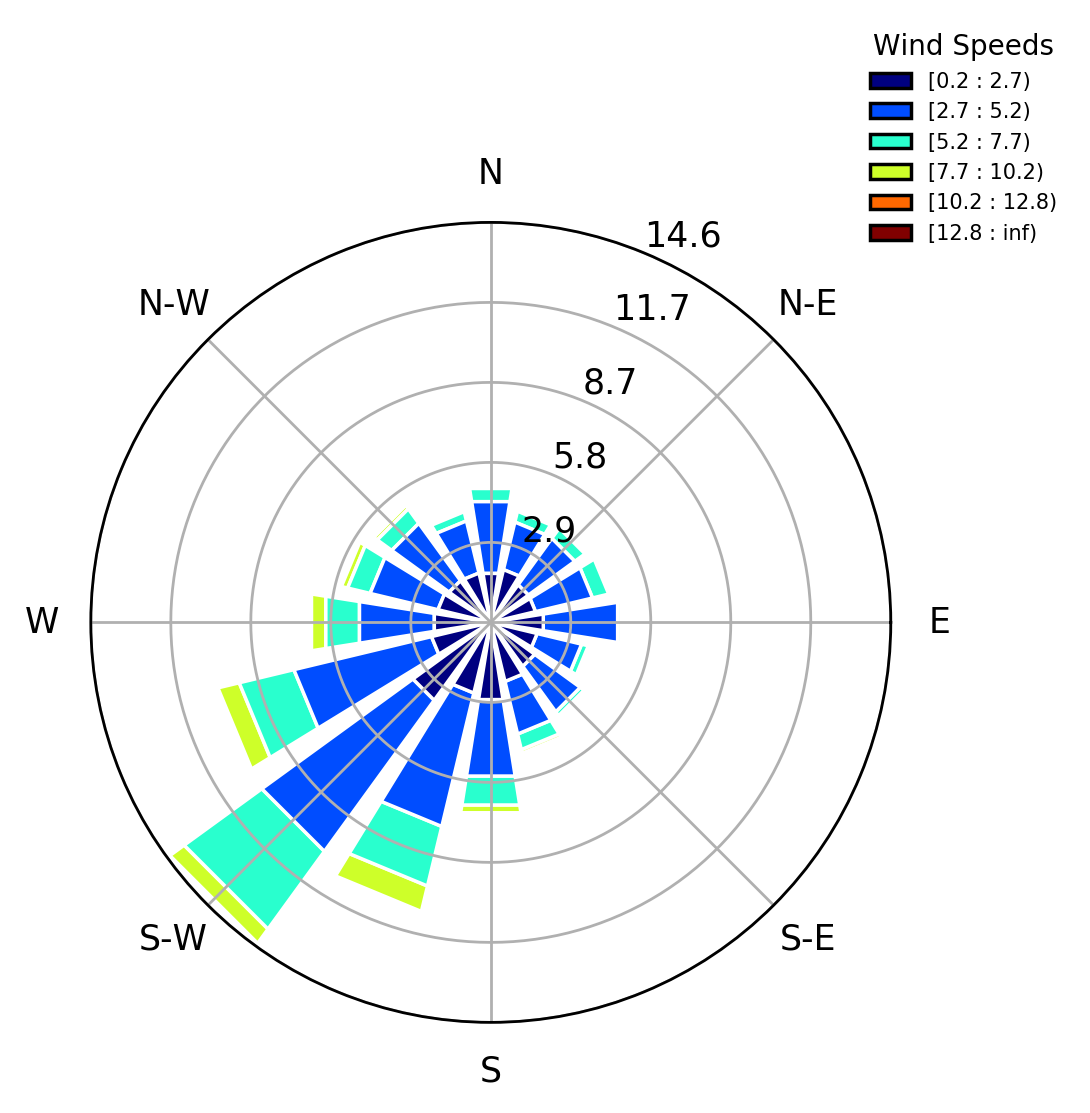

In [10]:
fig = plt.figure(dpi=250)
ax = WindroseAxes.from_ax(fig=fig)

ax.bar(df_focus['windBearing'], df_focus['windSpeed'], normed=True, opening=0.8, edgecolor='white')

ax.legend(frameon=False, bbox_to_anchor=(0.95, 0.95), 
          title='Wind Speeds', prop={'size': 6}, title_fontsize=8)

<br>

For ozone we'll take a similar approach to temperature

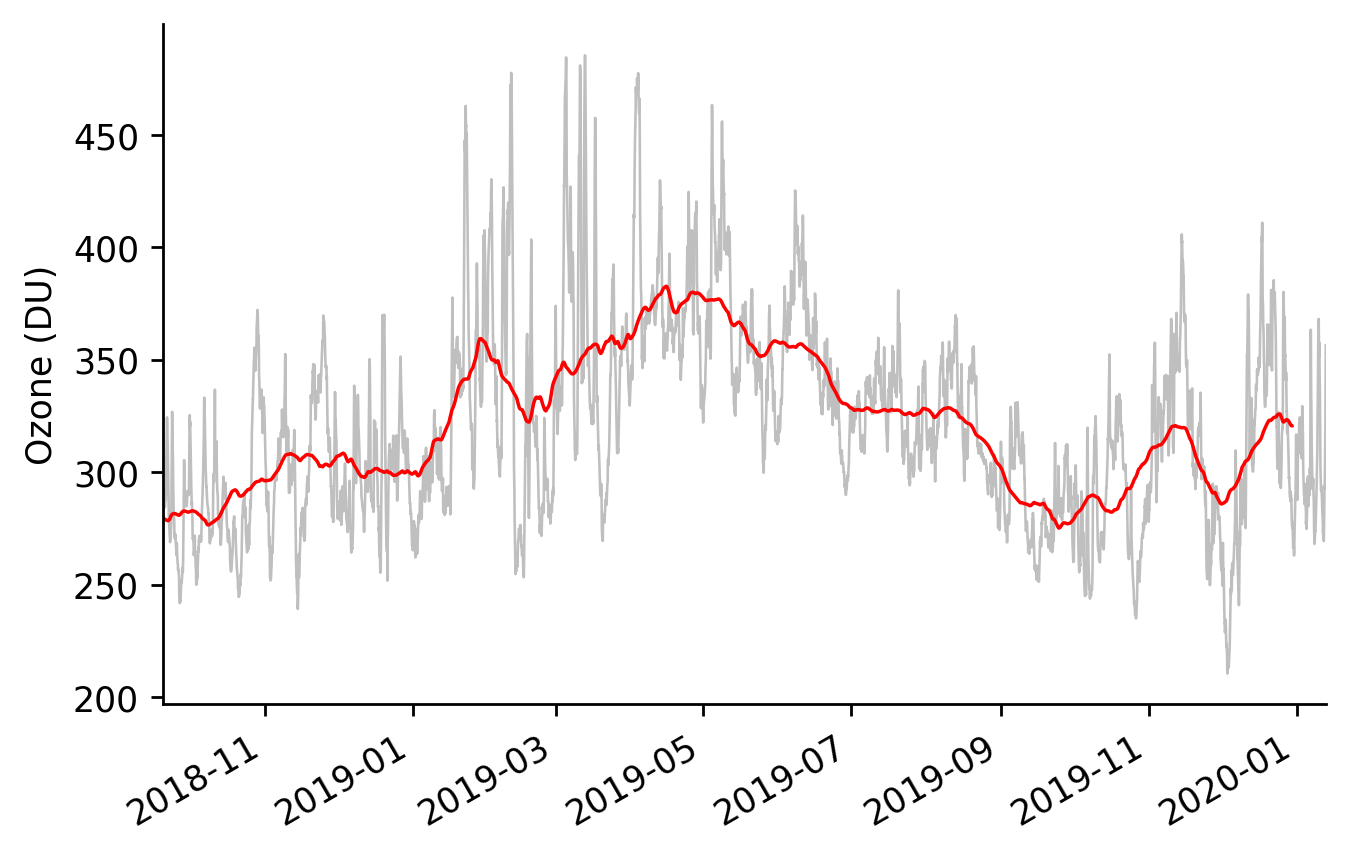

In [11]:
rolling_days = 28

s_rolling_ozone = (df_focus
                  ['ozone']
                  .rolling(f'{rolling_days}D')
                  .mean()
                  .shift(-rolling_days//2, freq='D')
                 )

## Plotting
fig, ax = plt.subplots(dpi=250)

df_focus['ozone'].plot(ax=ax, color='k', linewidth=0.75, alpha=0.25)
s_rolling_ozone.plot(ax=ax, color='red', linewidth=1)

ax.set_xlabel('')
ax.set_ylabel('Ozone (DU)')
ax.set_xlim(df_focus.index[0], df_focus.index[-1])

hide_spines(ax)

<br>

Finally we'll look at how rainfall changes on a monthly basis.

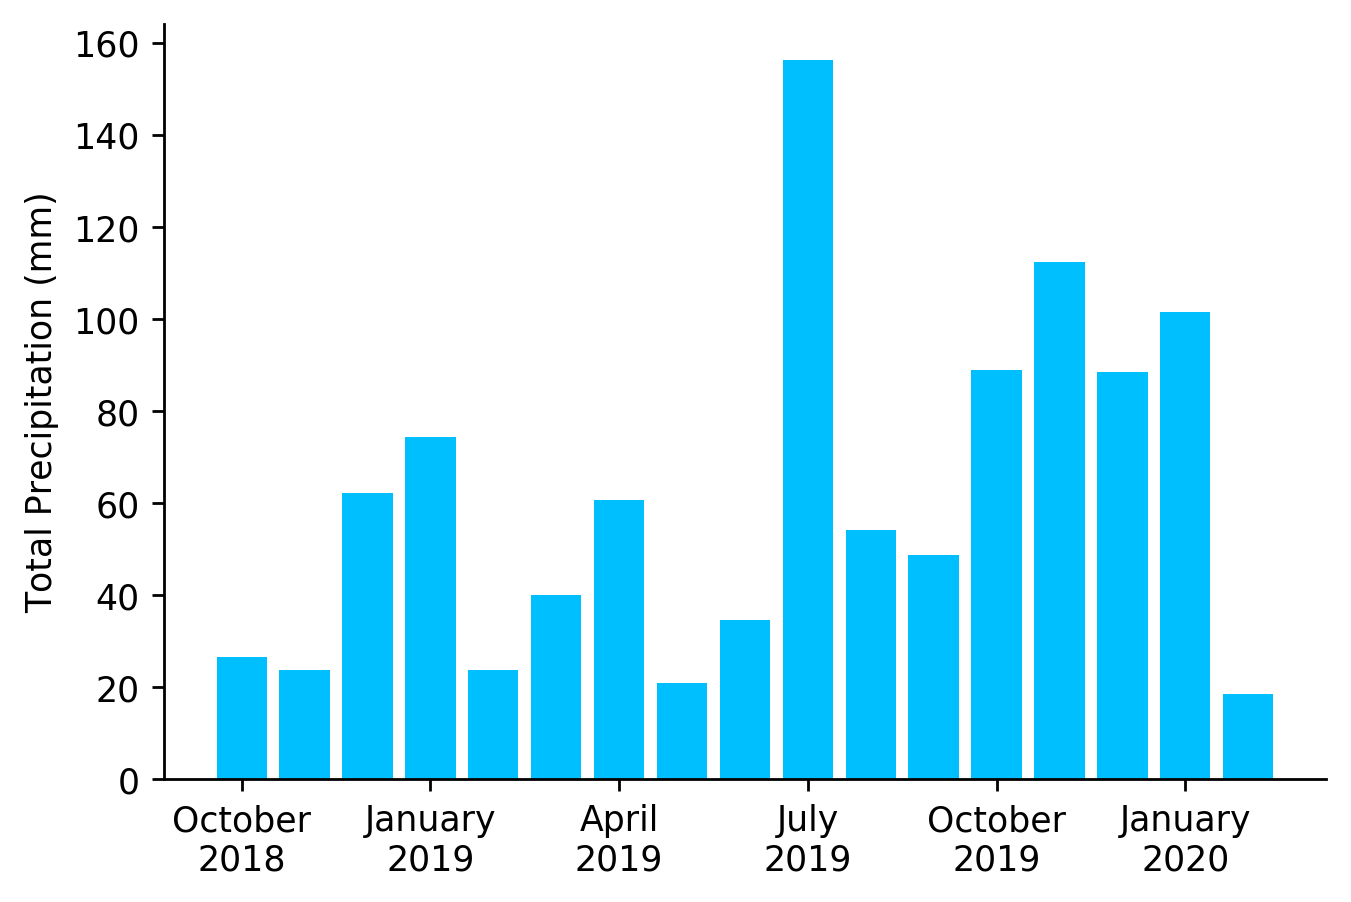

In [12]:
s_monthly_precip = (df_focus
                    ['precipIntensity']
                    .resample('M')
                    .sum()
                    .shift(15, 'D')
                   )

dates = s_monthly_precip.index
precip_mm = s_monthly_precip.values

dt_idxs = list(range(dates.shape[0]))
labels = [f'{x[0]}\n{x[1]}' for x in list(zip(dates.month_name(), dates.year.astype(str)))]

## Plotting
fig, ax = plt.subplots(dpi=250)

ax.bar(dt_idxs, precip_mm, color='deepskyblue')

ax.set_xticks(dt_idxs[::3])
ax.set_xticklabels(labels[::3])
ax.set_ylabel('Total Precipitation (mm)')

hide_spines(ax)